<a href="https://colab.research.google.com/github/bpandey369/Fast-tag-Fraud-detection/blob/main/Fast_tag_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/bpandey369/Fast-tag-Fraud-detection/main/FastagFraudDetection.csv')

In [4]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


Chi-square Statistic: 227.36756639387707
p-value: 2.791048100424726e-46


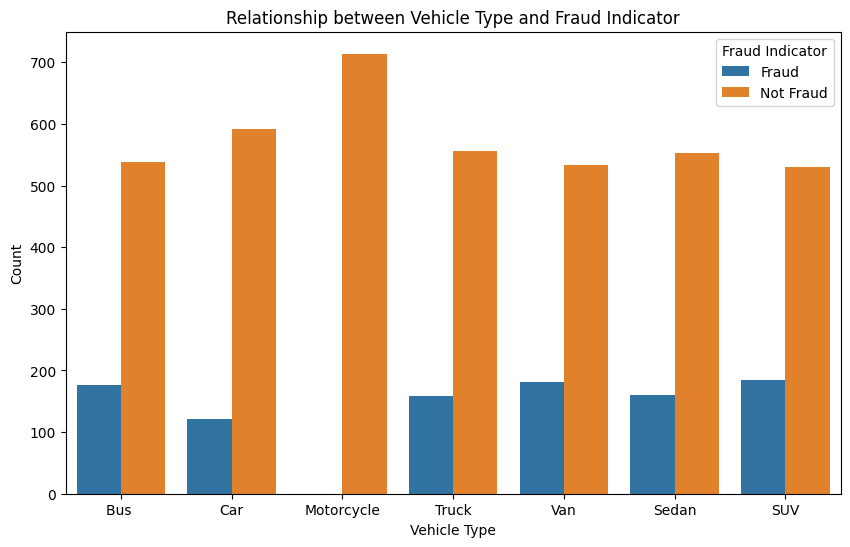

In [13]:
# Crosstabulation
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['Vehicle_Type'], data['Fraud_indicator'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square Statistic:", chi2)
print("p-value:", p)
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=data)
plt.title('Relationship between Vehicle Type and Fraud Indicator')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.legend(title='Fraud Indicator', loc='upper right')
plt.show()

Chi-square Statistic: 24.180580982131332
p-value: 8.771224262158539e-07


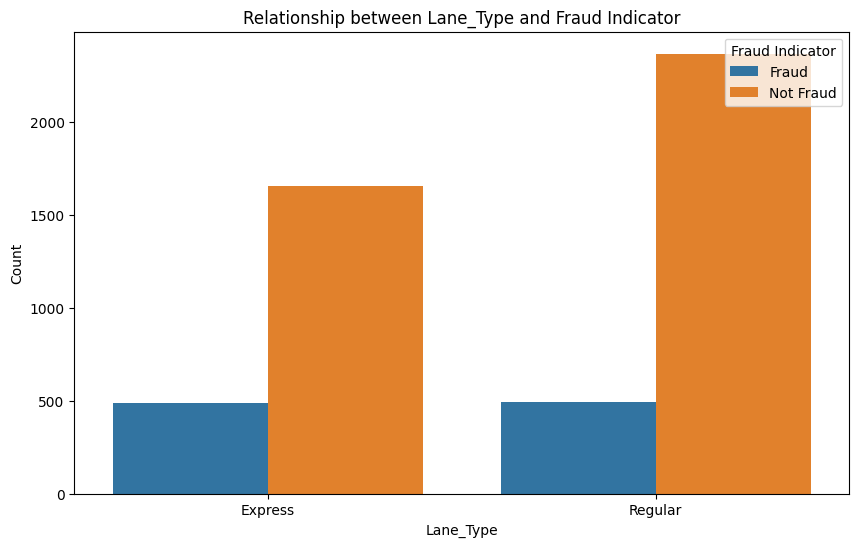

In [11]:
# Crosstabulation
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['Lane_Type'], data['Fraud_indicator'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square Statistic:", chi2)
print("p-value:", p)
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=data)
plt.title('Relationship between Lane_Type and Fraud Indicator')
plt.xlabel('Lane_Type')
plt.ylabel('Count')
plt.legend(title='Fraud Indicator', loc='upper right')
plt.show()

Chi-square Statistic: 156.4278000403458
p-value: 1.076799420376296e-34


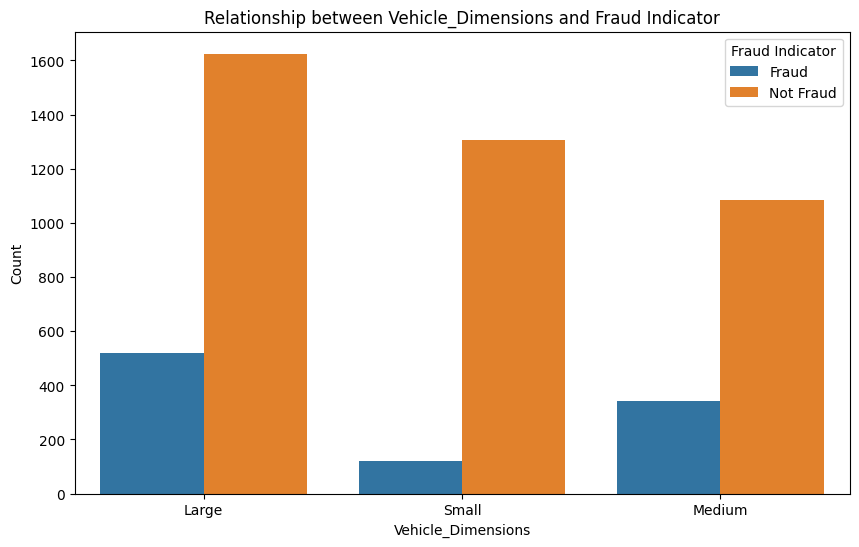

In [12]:
# Crosstabulation
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['Vehicle_Dimensions'], data['Fraud_indicator'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square Statistic:", chi2)
print("p-value:", p)
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Dimensions', hue='Fraud_indicator', data=data)
plt.title('Relationship between Vehicle_Dimensions and Fraud Indicator')
plt.xlabel('Vehicle_Dimensions')
plt.ylabel('Count')
plt.legend(title='Fraud Indicator', loc='upper right')
plt.show()

In [18]:
data.head(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


T-test statistic: 1.0318234415659226
p-value: 0.30220476179872036


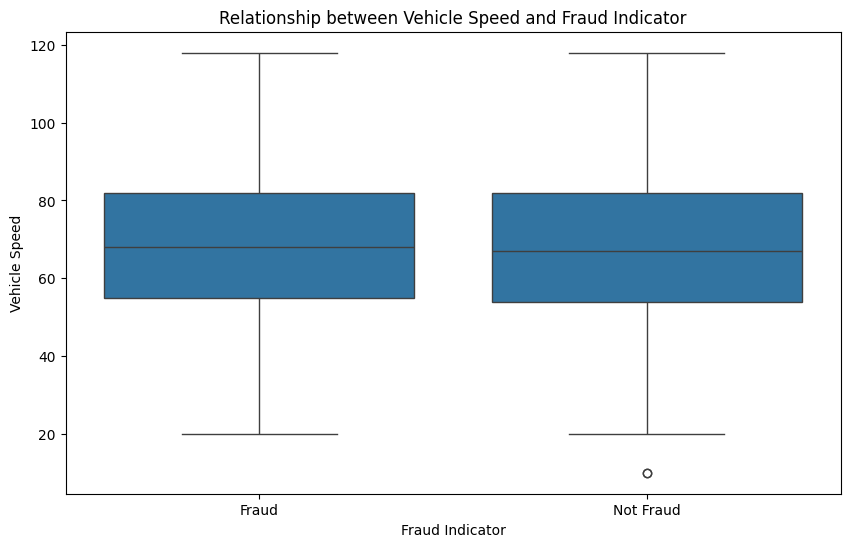

In [19]:
# Visualization
from scipy.stats import ttest_ind

 #T-test
fraudulent_speed = data[data['Fraud_indicator'] == 'Fraud']['Vehicle_Speed']
non_fraudulent_speed = data[data['Fraud_indicator'] == 'Not Fraud']['Vehicle_Speed']
t_statistic, p_value = ttest_ind(fraudulent_speed, non_fraudulent_speed)
print("T-test statistic:", t_statistic)
print("p-value:", p_value)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=data)
plt.title('Relationship between Vehicle Speed and Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Vehicle Speed')
plt.show()


T-test statistic: -16.32390038253155
p-value: 2.1152726464470254e-58


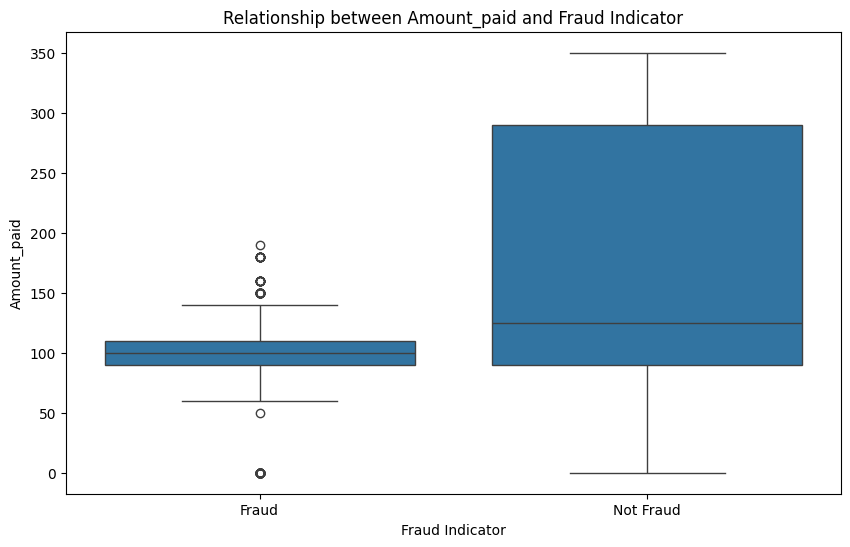

In [21]:
# Visualization
from scipy.stats import ttest_ind

 #T-test
fraudulent_amount = data[data['Fraud_indicator'] == 'Fraud']['Amount_paid']
non_fraudulent_amount = data[data['Fraud_indicator'] == 'Not Fraud']['Amount_paid']
t_statistic, p_value = ttest_ind(fraudulent_amount, non_fraudulent_amount)
print("T-test statistic:", t_statistic)
print("p-value:", p_value)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_indicator', y='Amount_paid', data=data)
plt.title('Relationship between Amount_paid and Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Amount_paid')
plt.show()


T-test statistic: 10.21145475752237
p-value: 3.0439767702089614e-24


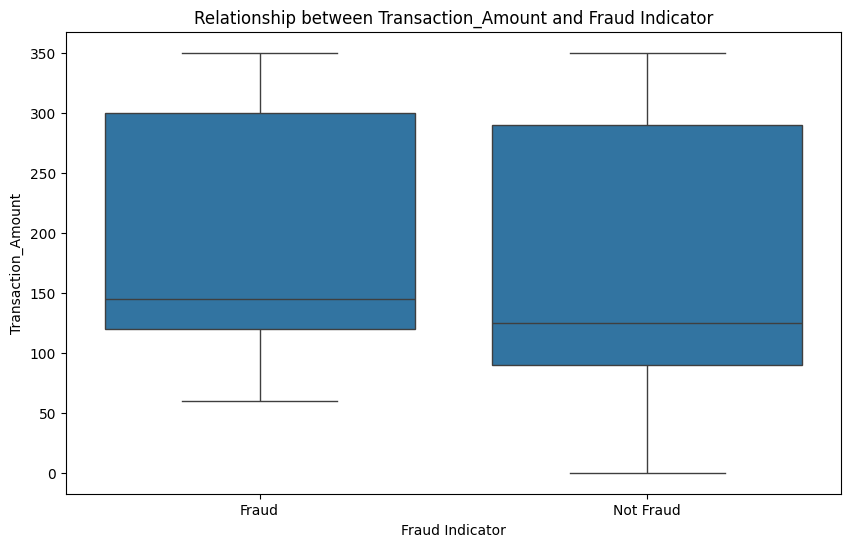

In [22]:
# Visualization
from scipy.stats import ttest_ind

 #T-test
fraudulent_amount = data[data['Fraud_indicator'] == 'Fraud']['Transaction_Amount']
non_fraudulent_amount = data[data['Fraud_indicator'] == 'Not Fraud']['Transaction_Amount']
t_statistic, p_value = ttest_ind(fraudulent_amount, non_fraudulent_amount)
print("T-test statistic:", t_statistic)
print("p-value:", p_value)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=data)
plt.title('Relationship between Transaction_Amount and Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Transaction_Amount')
plt.show()


In [26]:
#important features
data[['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions',
      'Transaction_Amount', 'Amount_paid', 'Fraud_indicator']]

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Fraud_indicator
0,Bus,Express,Large,350,120,Fraud
1,Car,Regular,Small,120,100,Fraud
2,Motorcycle,Regular,Small,0,0,Not Fraud
3,Truck,Regular,Large,350,120,Fraud
4,Van,Express,Medium,140,100,Fraud
...,...,...,...,...,...,...
4995,Truck,Regular,Large,330,330,Not Fraud
4996,Van,Express,Medium,125,125,Not Fraud
4997,Sedan,Regular,Medium,115,115,Not Fraud
4998,SUV,Express,Large,145,145,Not Fraud


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define column transformer for preprocessing
preprocessor = ColumnTransformer([
    ('categorical_onehot', OneHotEncoder(), ['Vehicle_Type', 'Lane_Type']),
    ('ordinal_encoding', OrdinalEncoder(categories=[['Small', 'Medium', 'Large']]), ['Vehicle_Dimensions']),
    ('numeric_scaling', StandardScaler(), ['Transaction_Amount', 'Amount_paid'])
])

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Assuming 'X_train' is your feature matrix and 'y_train' is your target variable
grid_search.fit(data[['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions',
      'Transaction_Amount', 'Amount_paid']], data['Fraud_indicator'])

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Optionally, you can also retrieve the best model from grid search
best_model = grid_search.best_estimator_


Best Parameters: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Accuracy: 0.9968


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data[['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions',
      'Transaction_Amount', 'Amount_paid']],  data['Fraud_indicator'], test_size=0.2, random_state=42)

In [42]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('categorical_onehot', OneHotEncoder(),
                                 ['Vehicle_Type', 'Lane_Type']),
                                ('ordinal_encoding',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'Large']]),
                                 ['Vehicle_Dimensions']),
                                ('numeric_scaling', StandardScaler(),
                                 ['Transaction_Amount', 'Amount_paid'])])

In [43]:
preprocessor.fit_transform(X_test)

array([[ 0.        ,  0.        ,  0.        , ...,  2.        ,
         1.18508016,  1.46490674],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -1.42897114, -1.3133966 ],
       [ 0.        ,  0.        ,  0.        , ...,  2.        ,
         0.13945964,  0.3535854 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  2.        ,
         1.09794511,  1.37229663],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.38335062, -0.20207526],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.81902584, -0.57251571]])

In [45]:
X_train

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid
4227,Sedan,Regular,Medium,110,110
4676,SUV,Express,Large,145,145
800,Motorcycle,Regular,Small,0,0
3671,Motorcycle,Regular,Small,0,0
4193,SUV,Regular,Large,140,140
...,...,...,...,...,...
4426,Car,Express,Small,70,70
466,Van,Express,Medium,140,140
3092,Van,Express,Medium,110,110
3772,Sedan,Express,Medium,120,100


In [46]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, random_state=42)

In [48]:
clf.fit(preprocessor.fit_transform(X_train), y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = clf.predict(preprocessor.fit_transform(X_train))

In [54]:
y_test

1501    Not Fraud
2586    Not Fraud
2653    Not Fraud
1055    Not Fraud
705     Not Fraud
          ...    
4711    Not Fraud
2313    Not Fraud
3214    Not Fraud
2732    Not Fraud
1926        Fraud
Name: Fraud_indicator, Length: 1000, dtype: object

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X_test' is your test feature matrix and 'y_test' is your test target variable
# Predict the labels using the best model obtained from GridSearchCV
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='Fraud')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='Fraud')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label='Fraud')
print("F1 Score:", f1)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


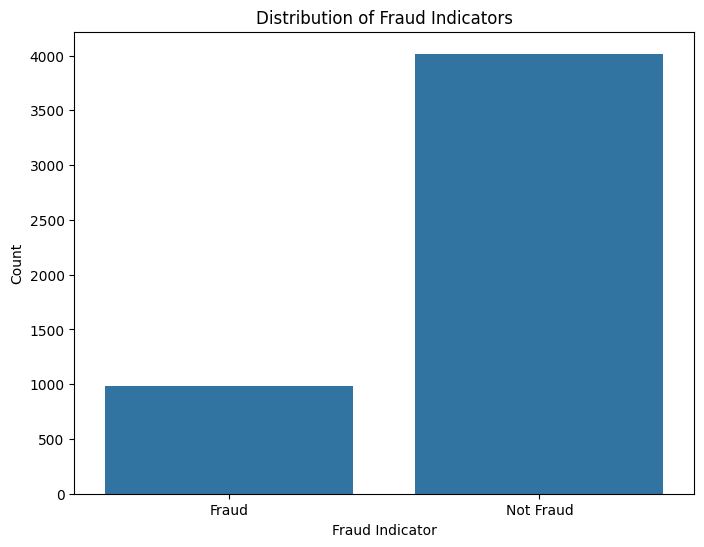

In [57]:
# Visualize the distribution of fraud indicators
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Distribution of Fraud Indicators')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00       217
   Not Fraud       1.00      1.00      1.00       783

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



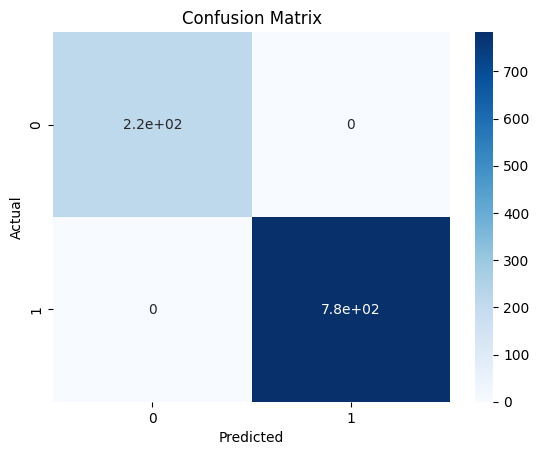

In [58]:
# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
